# Data Science Project
## Airline Ticket Prices in India - Data Analysis & Predictive Modeling

**Project Prepared by:** Diaa Aldein Alsayed Ibrahim Osman  
**Prepared for:** Epsilon AI Institute  

**Background:**  
This dataset contains price (airfare) data for flights between major cities in India. India stands as one of the largest aviation hubs globally.

**Project Overview:**  
In this project, we're diving into the Airline Ticket Prices in India dataset to understand how ticket prices work. Our main goal is to create a smart computer model that can predict ticket prices based on different factors. By using tools like data analytics and machine learning, we want to find helpful information in the data.

**Who Will Benefit:**
This project aims to assist airlines, travel agencies, and travelers. For airlines and agencies, the model can provide insights for effective pricing strategies. Travelers can benefit by gaining a better understanding of how ticket prices are determined, helping them make informed choices and possibly find more affordable options.

# Step 2: Data Analysis 

### The main objectives of this analysis are:
## **1. Statistical analysis:** 
   - Explore important numerical and categorical features statistics in the data sets.

## **2. Correlation & Correlation Heatmap:** 
   - To uncover correlations between features and the extent of their relationships.
       
## **3. Analysis and visualization around the following questions:**
 
   ### - Univariate analysis:
      1. What are the highest frequently occurring sub-categorical features?
   ### - Bivariate analysis:
   
      1. What is the impact of each sub-feature on Price ratios?
      
## **4. Analysis outcomes or summary: **
   - Summarizing all the above steps outcomes as markdown.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading the dataset.
df = pd.read_csv("cleaned_data.csv")
df

,airline,source,destination,route,duration,total_stops,price,year,month,day,day_name,holiday,season,dep_hour,dep_minute,dep_time,arrival_hour,arrival_minute,arrival_time
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,2019,1,5,Saturday,1,Winter,5,50,Early Morning,13,15,Afternoon
1,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,2019,12,5,Thursday,0,Winter,18,5,Evening,23,30,Night
2,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,13302,2019,1,3,Thursday,0,Winter,16,50,Evening,21,35,Night
3,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,3873,2019,6,24,Monday,0,Rainy,9,0,Morning,11,25,Morning
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,470,1,8625,2019,5,27,Monday,0,Summer,11,25,Morning,19,15,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8417,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,4107,2019,9,4,Wednesday,0,Rainy,19,55,Evening,22,25,Night
8418,Air India,Kolkata,Banglore,CCU → BLR,155,0,4145,2019,4,27,Saturday,1,Summer,20,45,Night,23,20,Night
8419,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,7229,2019,4,27,Saturday,1,Summer,8,20,Morning,11,20,Morning
8420,Vistara,Banglore,Delhi,BLR → DEL,160,0,12648,2019,1,3,Thursday,0,Winter,11,30,Morning,14,10,Afternoon


In [3]:
# Geitting Information about the Data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8422 entries, 0 to 8421
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         8422 non-null   object
 1   source          8422 non-null   object
 2   destination     8422 non-null   object
 3   route           8422 non-null   object
 4   duration        8422 non-null   int64 
 5   total_stops     8422 non-null   int64 
 6   price           8422 non-null   int64 
 7   year            8422 non-null   int64 
 8   month           8422 non-null   int64 
 9   day             8422 non-null   int64 
 10  day_name        8422 non-null   object
 11  holiday         8422 non-null   int64 
 12  season          8422 non-null   object
 13  dep_hour        8422 non-null   int64 
 14  dep_minute      8422 non-null   int64 
 15  dep_time        8422 non-null   object
 16  arrival_hour    8422 non-null   int64 
 17  arrival_minute  8422 non-null   int64 
 18  arrival_

In [4]:
#checking for duplication in data 
df.duplicated().sum()

0

## 1. Statistical analysis:

In [5]:
# statistcal description for numeric features
round(df.describe(),2)

,duration,total_stops,price,year,month,day,holiday,dep_hour,dep_minute,arrival_hour,arrival_minute
count,8422.00,8422.00,8422.00,8422.0,8422.00,8422.00,8422.00,8422.00,8422.00,8422.00,8422.00
mean,527.90,0.72,8446.46,2019.0,5.24,14.38,0.23,11.65,24.32,14.39,24.56
std,447.17,0.65,4415.85,0.0,2.61,8.82,0.42,5.53,18.71,6.56,16.99
min,75.00,0.00,1759.00,2019.0,1.00,3.00,0.00,0.00,0.00,0.00,0.00
25%,170.00,0.00,4839.75,2019.0,3.00,5.00,0.00,7.00,5.00,10.00,10.00
50%,390.00,1.00,7318.00,2019.0,5.00,15.00,0.00,10.00,25.00,16.00,25.00
75%,750.00,1.00,11264.00,2019.0,6.00,21.00,0.00,17.00,40.00,19.00,35.00
max,2820.00,3.00,79512.00,2019.0,12.00,27.00,1.00,23.00,55.00,23.00,55.00


In [6]:
# statistcal description for categorical features
df.describe(include="O")

,airline,source,destination,route,day_name,season,dep_time,arrival_time
count,8422,8422,8422,8422,8422,8422,8422,8422
unique,12,5,5,112,7,3,6,6
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,Thursday,Summer,Morning,Evening
freq,2575,3511,3511,1924,1795,4396,2365,2296


* **First Statistical Description for Some Numeric Features:** 

1. **price:** Ranges from **1759** to **79512**, The mean price is **8446.46**, and the median is **7318**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper ticket price values.

2. **duration:** Ranges from **75** to **2820** minutes, The mean duration is **527.90**, and the median is **390.00**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper ticket price values.

3. **year:** As all description like the min,max,median, and mean all have the same value 2019 which reflect all the data collected or concerned with year 2019. 

* **Second Statistical Description for Categorical Features:**
    1. **airline:** Out of **8,422** airline ticket, the most frequented airline name is **Jet Airways**, which has **2575** values out of 12 total airline company unique name.
    
    2. **source:** Out of **8,422** airline ticket, the most frequented source city is **Delhi**, which has **3511** source values out of 5 total source city unique name.
    
    3. **destination:** Out of **8,422** airline ticket, the most frequented destination city is **Cochin**, which has **3511** values out of 5 total destination city unique name.
    
    4. **route:** Out of **8,422** airline ticket, the most frequented route is **DEL → BOM → COK**, which has **1924** values out of 112 total route unique name with only One stop trip.
    
    5. **day_name:** Out of **8,422** airline ticket, the most frequented day_name is **Thursday**, which has **1795** values out of 7 total unique day_name.
    
    6. **season:** Out of **8,422** airline ticket, the most frequented season is **Summer**, which has **4396** values out of 3 total unique season in the data indicate one missing season from the data and the data not covering all the year 2019.
    
    7. **dep_time:** Out of **8,422** airline ticket, the most frequented dep_time is **Morning**, which has **2365** values out of 6 total unique dep_time during the day.
    
    8. **arrival_time:** Out of **8,422** airline ticket, the most frequented arrival_time is **Evening**, which has **2296** values out of 6 total unique arrival_time during the day.
    

## 2. Correlation & Correlation Heatmap:

In [9]:
# Correlation show the relationship between features.
correlation_matrix = round(df.corr(),2)
correlation_matrix

,duration,total_stops,price,year,month,day,holiday,dep_hour,dep_minute,arrival_hour,arrival_minute
duration,1.00,0.74,0.51,NaN,-0.05,0.17,0.06,-0.03,-0.03,0.07,-0.10
total_stops,0.74,1.00,0.62,NaN,-0.00,0.09,0.01,-0.10,-0.02,0.11,-0.15
price,0.51,0.62,1.00,NaN,-0.03,-0.07,0.07,-0.05,-0.06,0.11,-0.12
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.05,-0.00,-0.03,NaN,1.00,-0.24,-0.32,-0.04,-0.01,0.08,-0.04
day,0.17,0.09,-0.07,NaN,-0.24,1.00,0.00,0.14,-0.02,-0.15,-0.01
holiday,0.06,0.01,0.07,NaN,-0.32,0.00,1.00,0.02,0.02,-0.03,0.00
dep_hour,-0.03,-0.10,-0.05,NaN,-0.04,0.14,0.02,1.00,-0.03,0.10,0.11
dep_minute,-0.03,-0.02,-0.06,NaN,-0.01,-0.02,0.02,-0.03,1.00,0.05,-0.04
arrival_hour,0.07,0.11,0.11,NaN,0.08,-0.15,-0.03,0.10,0.05,1.00,-0.15


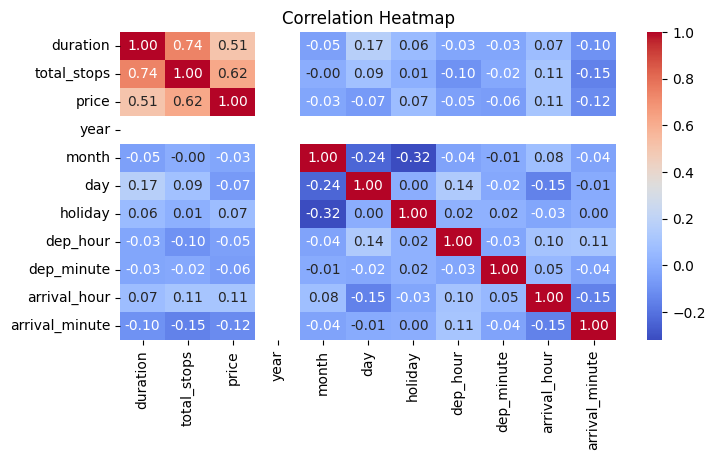

In [10]:
# heatmap visualize the correlation 
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Analysis Summary

#### 1. Duration and Total Stops:
    - Strong positive correlation (0.74): Longer durations are associated with more total stops.

#### 2. Duration and Price:
    - Moderate positive correlation (0.51): Longer durations are associated with higher prices.

#### 3. Total Stops and Price:
    - Moderate positive correlation (0.62): More total stops are associated with higher prices.

* While it is often assumed that an increase in the number of total stops or longer flight durations would lead to lower ticket prices, the data suggests the opposite. The correlations indicate that, on average, longer durations and more total stops tend to be associated with higher ticket prices. This Unexpectedly finding underscores the complexity of factors influencing airfare and emphasizes the importance of considering various aspects when predicting ticket prices.

*Note: Correlation does not imply causation, and these interpretations are based on the observed associations in the data.*

## 3. Analysis and visualization
## - Univariant analysis:

In [11]:
df.head()

,airline,source,destination,route,duration,total_stops,price,year,month,day,day_name,holiday,season,dep_hour,dep_minute,dep_time,arrival_hour,arrival_minute,arrival_time
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,2019,1,5,Saturday,1,Winter,5,50,Early Morning,13,15,Afternoon
1,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,2019,12,5,Thursday,0,Winter,18,5,Evening,23,30,Night
2,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,13302,2019,1,3,Thursday,0,Winter,16,50,Evening,21,35,Night
3,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,3873,2019,6,24,Monday,0,Rainy,9,0,Morning,11,25,Morning
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,470,1,8625,2019,5,27,Monday,0,Summer,11,25,Morning,19,15,Evening


### 1. What are the top airline company with numbers of ticket sold?

In [13]:
top_airline = df.airline.value_counts().sort_values(ascending=False)
top_airline 

Jet Airways                          2575
IndiGo                               1875
Air India                            1243
Multiple carriers                    1093
SpiceJet                              762
Vistara                               395
Air Asia                              273
GoAir                                 184
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

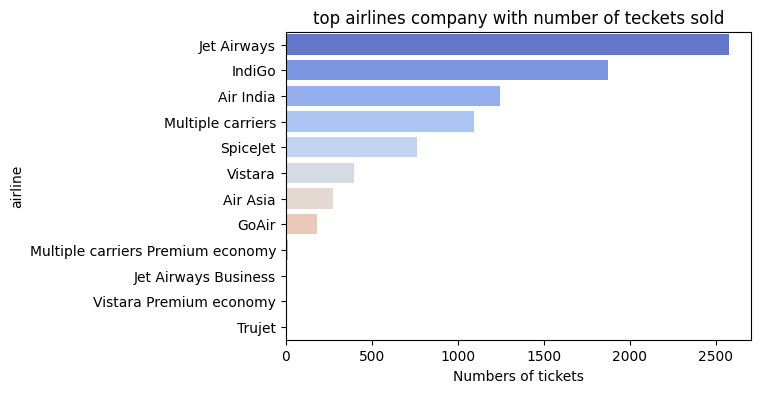

In [14]:
# Barplot chart Reflect the top airline company in order.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_airline.index, x=top_airline.values, palette='coolwarm')
plt.ylabel('airline')
plt.xlabel('Numbers of tickets')
plt.title('top airlines company with number of teckets sold')
plt.show()

* The data shows Jet Airways as the most frequent airline (2575 instances), followed by IndiGo (1875) and other notable low-cost carriers. Legacy carrier Air India is also significant (1243 instances), with instances of multiple carriers (1093 occurrences). Premium economy options from Vistara and multiple carriers are mentioned, though less frequently (3 and 13 instances).

### 2. What are the top source city with numbers of ticket sold?

In [15]:
top_source = df.source.value_counts().sort_values(ascending=False)
top_source 

Delhi       3511
Kolkata     2094
Banglore    1806
Mumbai       642
Chennai      369
Name: source, dtype: int64

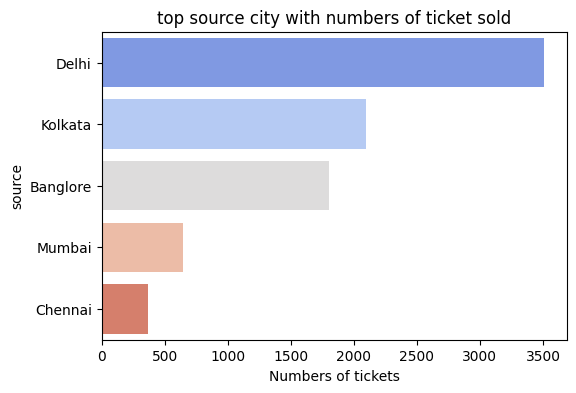

In [17]:
# Barplot chart Reflect the top source city with numbers of ticket sold
plt.figure(figsize=(6, 4))
sns.barplot(y=top_source.index, x=top_source.values, palette='coolwarm')
plt.ylabel('source')
plt.xlabel('Numbers of tickets')
plt.title('top source city with numbers of ticket sold')
plt.show()

* The data displays the frequency distribution of source cities in the dataset, with Delhi being the most frequent (3511 instances), followed by Kolkata (2094) and Banglore (1806). Mumbai and Chennai also appear, though with lower frequencies (642 and 369 instances, respectively). 

### 3. What are the top destination city with numbers of ticket sold?

In [18]:
top_destination = df.destination.value_counts().sort_values(ascending=False)
top_destination

Cochin       3511
Banglore     2094
Delhi        1806
Hyderabad     642
Kolkata       369
Name: destination, dtype: int64

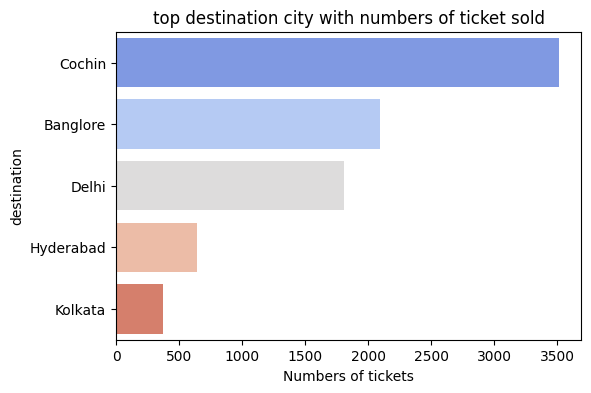

In [19]:
# Barplot chart Reflect the top destination city with numbers of ticket sold
plt.figure(figsize=(6, 4))
sns.barplot(y=top_destination.index, x=top_destination.values, palette='coolwarm')
plt.ylabel('destination')
plt.xlabel('Numbers of tickets')
plt.title('top destination city with numbers of ticket sold')
plt.show()

* The data illustrates the frequency distribution of destination cities in the dataset. Cochin is the most common destination (3511 instances), followed by Banglore (2094) and Delhi (1806). Hyderabad and Kolkata also appear, though with lower frequencies (642 and 369 instances, respectively).

### 4. What are the top 5 route with numbers of ticket sold?

In [24]:
top_route = df.route.value_counts().sort_values(ascending=False).head(5)
top_route

DEL → BOM → COK    1924
BLR → DEL          1455
CCU → BLR           665
CCU → BOM → BLR     637
BOM → HYD           607
Name: route, dtype: int64

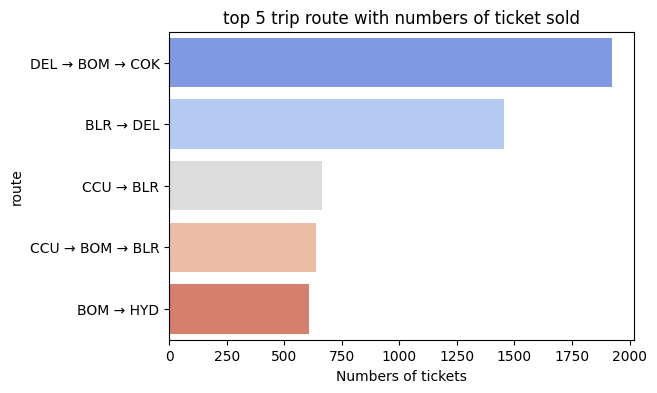

In [26]:
# Barplot chart Reflect the top 5 route with numbers of ticket sold
plt.figure(figsize=(6, 4))
sns.barplot(y=top_route.index, x=top_route.values, palette='coolwarm')
plt.ylabel('route')
plt.xlabel('Numbers of tickets')
plt.title('top 5 trip route with numbers of ticket sold')
plt.show()

* The data showcases the frequency distribution of the top 5 trip routes in the dataset. The route DEL → BOM → COK is the most common, appearing 1924 times, followed by BLR → DEL (1455 instances) and CCU → BLR (665 instances). The route CCU → BOM → BLR and BOM → HYD also feature, though with slightly lower frequencies (637 and 607 instances, respectively).

### 5. what is the mean duration and statistcal discription of the duration feature?

In [27]:
round(df.duration.describe(),2)

count    8422.00
mean      527.90
std       447.17
min        75.00
25%       170.00
50%       390.00
75%       750.00
max      2820.00
Name: duration, dtype: float64

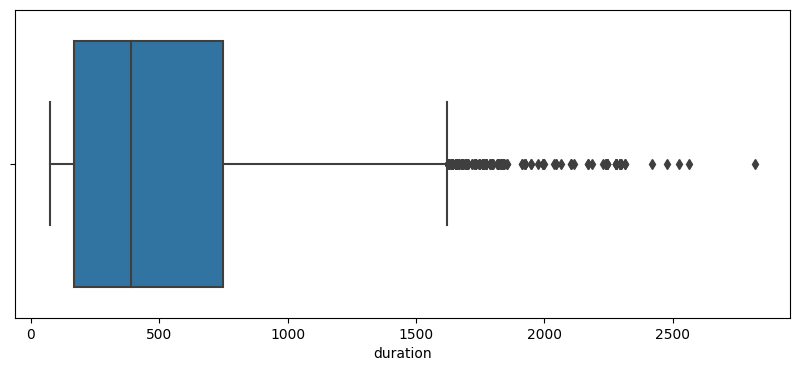

In [29]:
# boxplot for duration feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'duration')
plt.show()

* The duration in minutes column statistics reveal key insights about the distribution of flight durations in the dataset. The data comprises 8422 instances, with a mean duration of approximately 527.90 minutes. The mean being greater than the median (50th percentile) suggests a right-skewed distribution, indicating that there are outliers contributing to higher durations. The variability is substantial, as indicated by the standard deviation of 447.17 minutes. The minimum duration is 75 minutes, with quartiles at 170 (25th percentile), 390 (50th percentile), and 750 (75th percentile) minutes. The maximum recorded duration is 2820 minutes.

### 6. What are the top total_stops with numbers of ticket sold?

In [30]:
top_total_stops = df.total_stops.value_counts().sort_values(ascending=False)
top_total_stops

1    4227
0    3306
2     864
3      25
Name: total_stops, dtype: int64

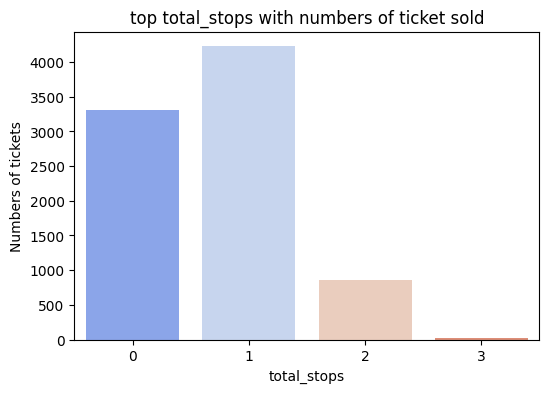

In [33]:
# Barplot chart Reflect the top total_stops with numbers of ticket sold
plt.figure(figsize=(6, 4))
sns.barplot(x=top_total_stops.index, y=top_total_stops.values, palette='coolwarm')
plt.ylabel('Numbers of tickets')
plt.xlabel('total_stops')
plt.title('top total_stops with numbers of ticket sold')
plt.show()

* The total trip stops distribution provides insights into the number of stops in the dataset. The majority of trips have 1 stop (4227 instances), followed by non-stop flights (3306 instances). Trips with 2 stops are less common but still significant (864 instances). Trips with 3 stops are relatively rare, with only 25 instances. This concise summary offers a quick overview of the prevalence of different total stop counts in the dataset, highlighting the dominance of single-stop and non-stop flights.

### 7. what is the mean price and statistcal discription of the price feature?

In [34]:
round(df.price.describe(),2)

count     8422.00
mean      8446.46
std       4415.85
min       1759.00
25%       4839.75
50%       7318.00
75%      11264.00
max      79512.00
Name: price, dtype: float64

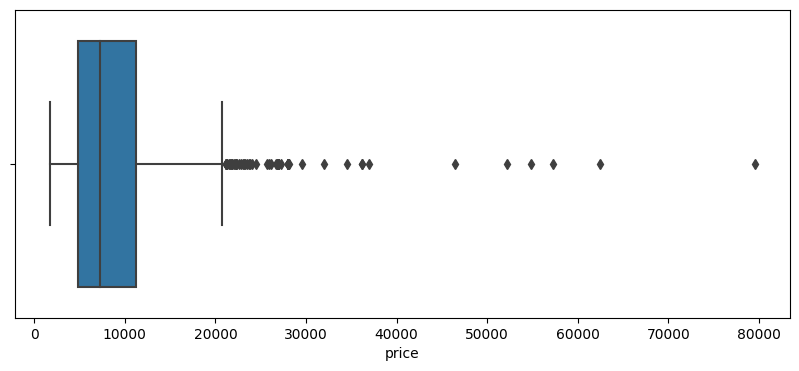

In [35]:
# boxplot for price feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'price')
plt.show()

* The price column statistics reveal key insights about the distribution of ticket prices in the dataset. The data comprises 8422 instances, with a mean price of approximately ₹8446.46 (Indian Rupees). The fact that the mean is greater than the median (50th percentile) suggests a right-skewed distribution, indicating the presence of outliers contributing to higher ticket prices. The variability is substantial, as indicated by the standard deviation of ₹4415.85. The minimum ticket price is ₹1759, with quartiles at ₹4839.75 (25th percentile), ₹7318 (50th percentile), and ₹11264 (75th percentile). The maximum recorded price is ₹79512.


### 8. What is the distribution of tickets during months?

In [36]:
month_dist = df.month.value_counts().sort_values(ascending=False)
month_dist

6     2135
5     2025
3     1947
9      752
1      619
12     520
4      424
Name: month, dtype: int64

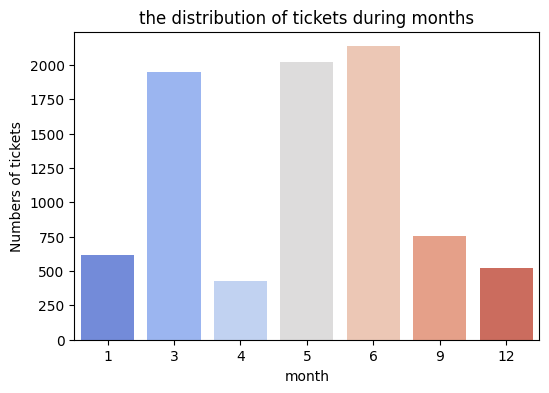

In [40]:
# Barplot chart Reflect the distribution of tickets during months
plt.figure(figsize=(6, 4))
sns.barplot(x=month_dist.index, y=month_dist.values, palette='coolwarm')
plt.ylabel('Numbers of tickets')
plt.xlabel('month')
plt.title('the distribution of tickets during months')
plt.show()

* The month table distribution highlights the frequency of flight occurrences in the dataset. June (Month 6) dominates with 2135 instances, followed by May (Month 5) at 2025, and March (Month 3) at 1947. September (Month 9) and January (Month 1) show lower frequencies with 752 and 619 instances, respectively. December (Month 12) and April (Month 4) have fewer instances, at 520 and 424. 
* Notably, there is no data available for February, July, August, October, and November, indicating a lack of information for those months. 

### 9. What is the distribution of tickets during days of the month?

In [44]:
day_dist = df.day.value_counts().sort_values(ascending=False)
day_dist

6     1409
27    1092
21    1054
24    1013
15     962
3      875
5      778
18     771
4      468
Name: day, dtype: int64

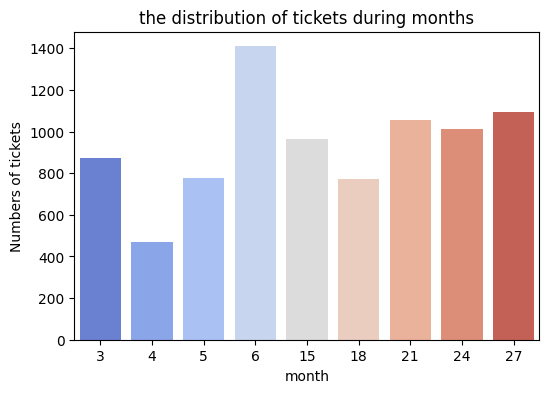

In [45]:
# Barplot chart Reflect the distribution of tickets during day of the month
plt.figure(figsize=(6, 4))
sns.barplot(x=day_dist.index, y=day_dist.values, palette='coolwarm')
plt.ylabel('Numbers of tickets')
plt.xlabel('month')
plt.title('the distribution of tickets during months')
plt.show()

* The day of the month distribution reveals the frequency of flight occurrences on different days in the dataset. The 6th day has the highest frequency with 1409 instances, followed by the 27th (1092) and 21st (1054) days. The 24th and 15th days also show notable frequencies with 1013 and 962 instances, respectively. Days 3, 5, 18, and 4 have fewer instances, ranging from 468 to 778. 

### 10. What is the distribution of tickets during days of the week?

In [46]:
day_name_dist = df.day_name.value_counts().sort_values(ascending=False)
day_name_dist

Thursday     1795
Wednesday    1274
Monday       1222
Friday       1207
Saturday     1044
Tuesday       982
Sunday        898
Name: day_name, dtype: int64

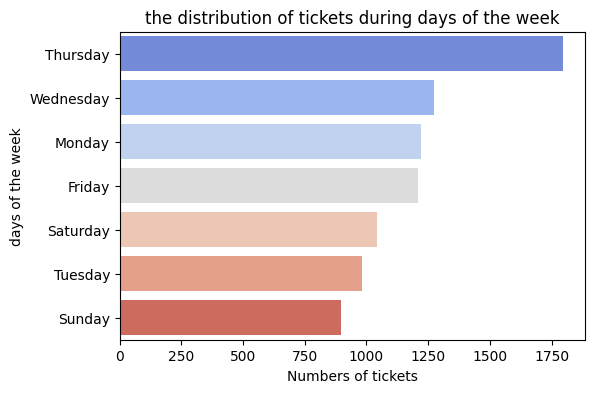

In [50]:
# Barplot chart Reflect the distribution of tickets during day of the month
plt.figure(figsize=(6, 4))
sns.barplot(y=day_name_dist.index, x=day_name_dist.values, palette='coolwarm')
plt.ylabel('days of the week')
plt.xlabel('Numbers of tickets')
plt.title('the distribution of tickets during days of the week')
plt.show()

* The distribution of days of the week reveals the frequency of flight occurrences on different weekdays in the dataset. Thursday has the highest frequency with 1795 instances, followed by Wednesday (1274) and Monday (1222). Friday and Saturday also show notable frequencies with 1207 and 1044 instances, respectively. Tuesday and Sunday have fewer instances, with 982 and 898, respectively. 

### 11. What is the distribution of tickets during holiday?

In [51]:
holiday_dist = df.holiday.value_counts().sort_values(ascending=False)
holiday_dist

0    6480
1    1942
Name: holiday, dtype: int64

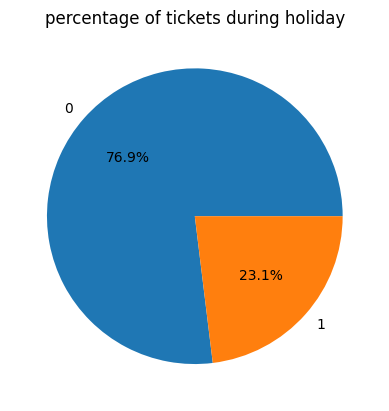

In [53]:
# pie chart show the percentage of tickets during holiday
plt.pie(holiday_dist, labels=holiday_dist.index, autopct='%1.1f%%')
plt.title('percentage of tickets during holiday')
plt.show()

* The distribution of holiday values reveals the frequency of flight occurrences on holidays and non-holidays in the dataset. Non-holidays (value 0) have the highest 76.9% frequency with 6480 instances, while holidays (value 1) also show 23.1% a substantial occurrence with 1942 instances. 

### 12. What is the distribution of tickets during seasons?

In [54]:
season_dist = df.season.value_counts().sort_values(ascending=False)
season_dist

Summer    4396
Rainy     2887
Winter    1139
Name: season, dtype: int64

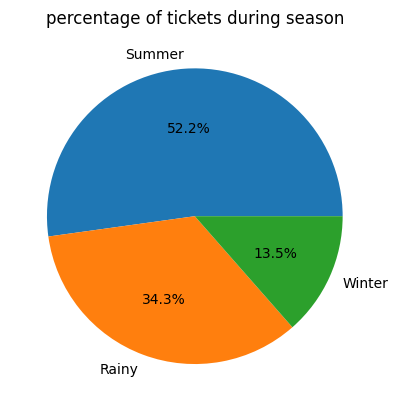

In [55]:
# pie chart show the percentage of tickets during season
plt.pie(season_dist, labels=season_dist.index, autopct='%1.1f%%')
plt.title('percentage of tickets during season')
plt.show()

* The distribution of season values highlights the frequency of flight occurrences during different seasons in the dataset. 52.2% Summer has the highest frequency with 4396 instances, followed by 34.3% Rainy (2887) and 13.5% Winter with (1139) instances.
* As mentioned earlier the missing of October and November data reflect in missing Autumn season.

### 13. What is the distribution of tickets during dep_time?

In [56]:
dep_time_dist = df.dep_time.value_counts().sort_values(ascending=False)
dep_time_dist

Morning          2365
Early Morning    2117
Evening          1536
Afternoon        1176
Night             942
Late Night        286
Name: dep_time, dtype: int64

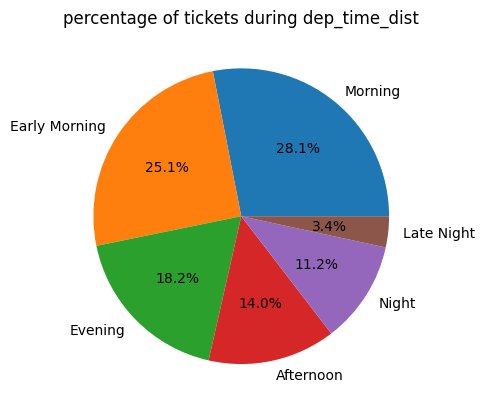

In [57]:
# pie chart show the percentage of tickets during dep_time_dist
plt.pie(dep_time_dist, labels=dep_time_dist.index, autopct='%1.1f%%')
plt.title('percentage of tickets during dep_time_dist')
plt.show()

* The distribution of departure times of the day provides insights into the frequency of flight occurrences during different time intervals. 28.1% Morning has the highest frequency with 2365 instances, followed by 25.1% Early Morning (2117) and 18.2% Evening (1536). 14% Afternoon and 11.2% Night also show notable frequencies with 1176 and 942 instances, respectively. Only 3.4% Late Night has a lower frequency with 286 instances.

### 14. What is the distribution of tickets during arrival_time?

In [58]:
arrival_time_dist = df.arrival_time.value_counts().sort_values(ascending=False)
arrival_time_dist

Evening          2296
Night            2084
Afternoon        1379
Morning          1234
Early Morning     843
Late Night        586
Name: arrival_time, dtype: int64

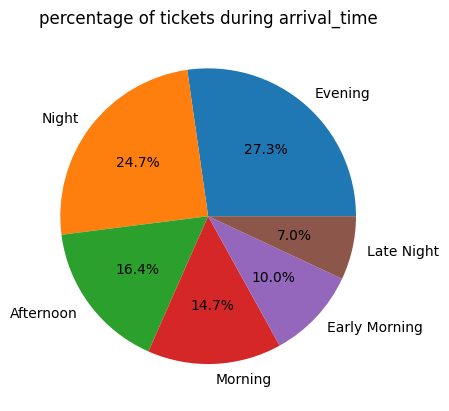

In [59]:
# pie chart show the percentage of tickets during arrival_time
plt.pie(arrival_time_dist, labels=arrival_time_dist.index, autopct='%1.1f%%')
plt.title('percentage of tickets during arrival_time')
plt.show()

* The distribution of arrival times of the day sheds light on the frequency of flight occurrences during different time intervals. 27.3% Evening has the highest frequency with 2296 instances, followed by 24.7% Night (2084) and 16.4% Afternoon (1379). 14.7% Morning and 10% Early Morning also show notable frequencies with 1234 and 843 instances, respectively. 7% Late Night has a lower frequency with 586 instances. 

## - Bivariate analysis:

### 1. Which airline company have higher mean price ticket?

In [64]:
airline_rate = round(df.groupby('airline')['price'].mean().sort_values(ascending=False),2)
airline_rate 

airline
Jet Airways Business                 59573.40
Multiple carriers Premium economy    11418.85
Jet Airways                          11058.11
Multiple carriers                    10753.92
Vistara Premium economy               8962.33
Air India                             8916.58
Vistara                               7463.21
GoAir                                 5785.73
IndiGo                                5599.47
Air Asia                              5483.48
SpiceJet                              4380.87
Trujet                                4140.00
Name: price, dtype: float64

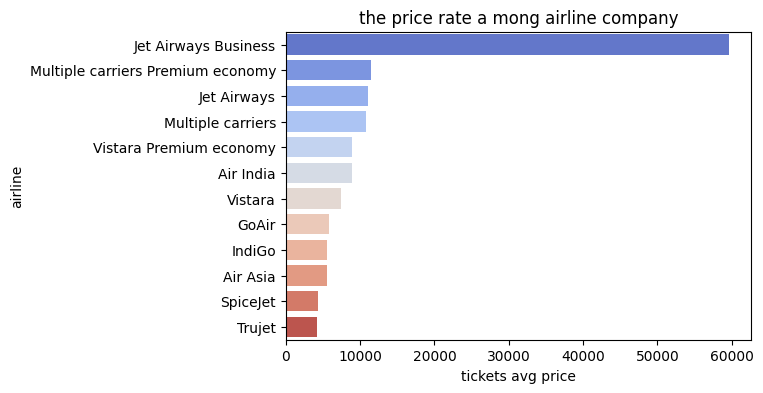

In [68]:
# Barplot chart Reflect ticket avg. price a mong airline company
plt.figure(figsize=(6, 4))
sns.barplot(y=airline_rate.index, x=airline_rate.values, palette='coolwarm')
plt.ylabel('airline')
plt.xlabel('tickets avg price')
plt.title('Ticket avg. price a mong airline company')
plt.show()

* The mean ticket prices for different airline companies provide insights into the average cost of flights with each carrier. Jet Airways Business has the highest mean price at ₹59573.40, followed by Multiple carriers Premium economy (₹11418.85), Jet Airways (₹11058.11), and Multiple carriers (₹10753.92). Vistara Premium economy, Air India, and Vistara also have notable mean prices at ₹8962.33, ₹8916.58, and ₹7463.21, respectively. The mean prices gradually decrease for GoAir, IndiGo, Air Asia, SpiceJet, and Trujet.

### 2. Which source city have higher mean price ticket?

In [67]:
source_rate = round(df.groupby('source')['price'].mean().sort_values(ascending=False),2)
source_rate 

source
Delhi       10100.14
Kolkata      8761.80
Banglore     7024.84
Chennai      4765.76
Mumbai       4488.85
Name: price, dtype: float64

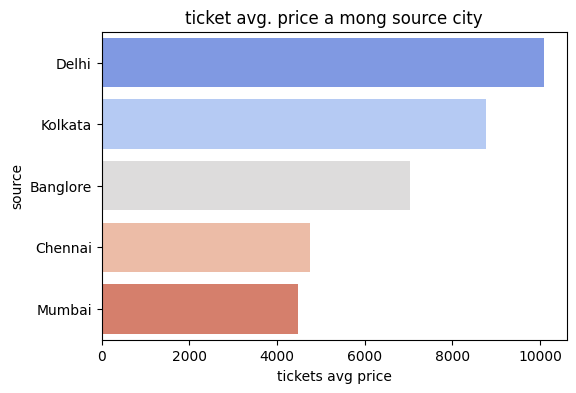

In [69]:
# Barplot chart Reflect ticket avg. price a mong source city
plt.figure(figsize=(6, 4))
sns.barplot(y=source_rate.index, x=source_rate.values, palette='coolwarm')
plt.ylabel('source')
plt.xlabel('tickets avg price')
plt.title('ticket avg. price a mong source city')
plt.show()

* The mean ticket prices for different source cities provide insights into the average cost of flights originating from each location. Delhi has the highest mean price at ₹10100.14, followed by Kolkata (₹8761.80), Banglore (₹7024.84), Chennai (₹4765.76), and Mumbai (₹4488.85). 

### 3. Which destination city have higher mean price ticket?

In [70]:
destination_rate = round(df.groupby('destination')['price'].mean().sort_values(ascending=False),2)
destination_rate 

destination
Cochin       10100.14
Banglore      8761.80
Delhi         7024.84
Kolkata       4765.76
Hyderabad     4488.85
Name: price, dtype: float64

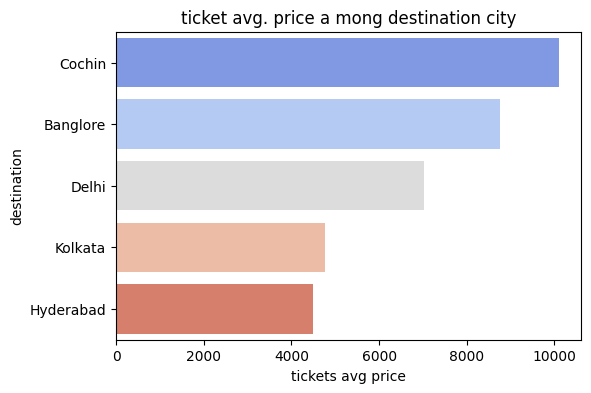

In [71]:
# Barplot chart Reflect ticket avg. price a mong destination city
plt.figure(figsize=(6, 4))
sns.barplot(y=destination_rate.index, x=destination_rate.values, palette='coolwarm')
plt.ylabel('destination')
plt.xlabel('tickets avg price')
plt.title('ticket avg. price a mong destination city')
plt.show()

* The mean ticket prices for different destination cities provide insights into the average cost of flights arriving at each location. Cochin has the highest mean price at ₹10100.14, followed by Banglore (₹8761.80), Delhi (₹7024.84), Kolkata (₹4765.76), and Hyderabad (₹4488.85).

### 4. Which trip route have higher mean price ticket?

In [103]:
top_route_rate = pd.DataFrame(round(df.groupby('route')['price'].mean().sort_values(ascending=False).head(5).reset_index(),2))
top_route_rate 

,route,price
0,BOM → VNS → DEL → HYD,23528.00
1,BOM → JDH → DEL → HYD,23231.00
2,DEL → IXU → BOM → COK,19353.29
3,DEL → GWL → IDR → BOM → COK,17917.33
4,BLR → BOM → BHO → DEL,17240.33


In [104]:
least_route_rate = pd.DataFrame(round(df.groupby('route')['price'].mean().sort_values(ascending=False).tail(5).reset_index(),2))
least_route_rate 

,route,price
0,MAA → CCU,4765.76
1,CCU → HYD → BLR,4748.90
2,CCU → BLR,4577.77
3,BOM → NDC → HYD,4140.00
4,BOM → HYD,3959.82


In [105]:
top_least_route_rate = pd.concat([top_route_rate,least_route_rate])
top_least_route_rate

,route,price
0,BOM → VNS → DEL → HYD,23528.00
1,BOM → JDH → DEL → HYD,23231.00
2,DEL → IXU → BOM → COK,19353.29
3,DEL → GWL → IDR → BOM → COK,17917.33
4,BLR → BOM → BHO → DEL,17240.33
0,MAA → CCU,4765.76
1,CCU → HYD → BLR,4748.90
2,CCU → BLR,4577.77
3,BOM → NDC → HYD,4140.00
4,BOM → HYD,3959.82


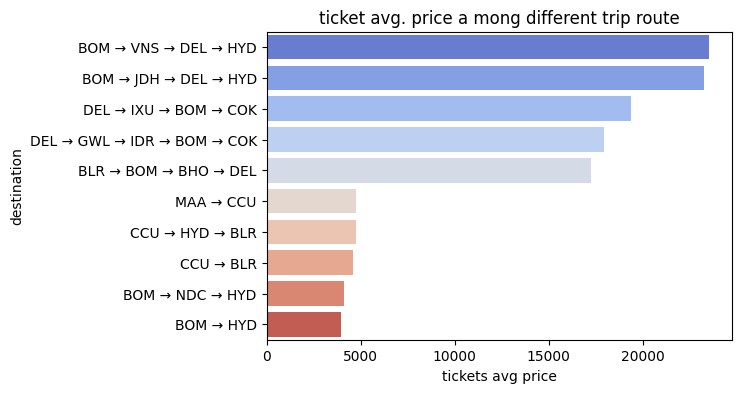

In [106]:
# Barplot chart Reflect ticket avg. price a mong different trip route
plt.figure(figsize=(6, 4))
sns.barplot(data=top_least_route_rate,y=top_least_route_rate['route'], x=top_least_route_rate['price'], palette='coolwarm')
plt.ylabel('destination')
plt.xlabel('tickets avg price')
plt.title('ticket avg. price a mong different trip route')
plt.show()

* the highest avg. price route with 2 stops BOM → VNS → DEL → HYD  cost 23528 avg. price. 
* the least avg.price route dirct or non-stop trip  BOM → HYD with 3959.82 avg price cost.

### 5. Which month have higher mean price ticket?

In [117]:
month_rate = pd.DataFrame(round(df.groupby('month')['price'].mean().sort_values(ascending=False).reset_index(),2))
month_rate 

,month,price
0,1,9406.10
1,5,9253.13
2,6,8541.82
3,3,8186.92
4,9,8139.87
5,12,7808.33
6,4,5230.86


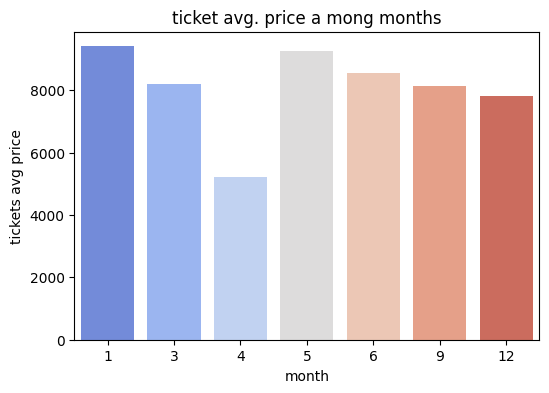

In [118]:
# Barplot chart Reflect ticket avg. price a mong months
plt.figure(figsize=(6, 4))
sns.barplot(data=month_rate,x='month', y='price', palette='coolwarm')
plt.ylabel('tickets avg price')
plt.xlabel('month')
plt.title('ticket avg. price a mong months')
plt.show()

* The average ticket prices vary across different months, providing insights into seasonal trends. January sees a mean ticket price of ₹9406.10, while May follows closely at ₹9253.13. June maintains a slightly lower average at ₹8541.82, and March and September have average prices of ₹8186.92 and ₹8139.87, respectively. December shows a mean ticket price of ₹7808.33, and April has a comparatively lower average at ₹5230.86.

### 6. Which week day have higher mean price ticket?

In [119]:
week_day_rate = pd.DataFrame(round(df.groupby('day_name')['price'].mean().sort_values(ascending=False).reset_index(),2))
week_day_rate 

,day_name,price
0,Sunday,9448.87
1,Thursday,9080.84
2,Monday,8596.31
3,Saturday,8567.13
4,Tuesday,8276.37
5,Friday,7660.79
6,Wednesday,7478.91


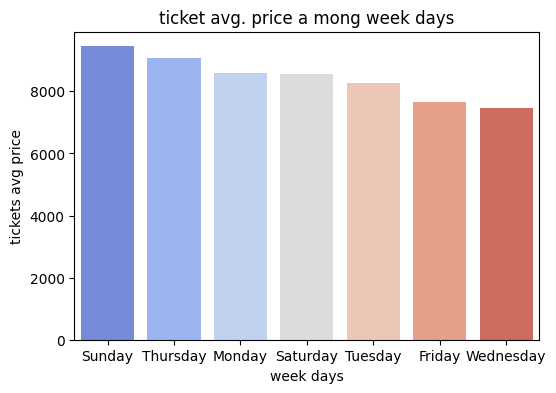

In [121]:
# Barplot chart Reflect ticket avg. price a mong week days
plt.figure(figsize=(6, 4))
sns.barplot(data=week_day_rate,x='day_name', y='price', palette='coolwarm')
plt.ylabel('tickets avg price')
plt.xlabel('week days')
plt.title('ticket avg. price a mong week days')
plt.show()

* The average ticket prices during different weekdays reveal fluctuations in pricing throughout the week. Sunday leads with a mean ticket price of ₹9448.87, followed by Thursday at ₹9080.84. Monday and Saturday maintain similar average prices, with ₹8596.31 and ₹8567.13, respectively. Tuesday shows a slightly lower average at ₹8276.37, while Friday has a mean ticket price of ₹7660.79. Wednesday marks the lowest average price among weekdays at ₹7478.91. 

### 7. Which season have higher mean price ticket?

In [122]:
season_rate = pd.DataFrame(round(df.groupby('season')['price'].mean().sort_values(ascending=False).reset_index(),2))
season_rate 

,season,price
0,Winter,8676.65
1,Rainy,8437.12
2,Summer,8392.95


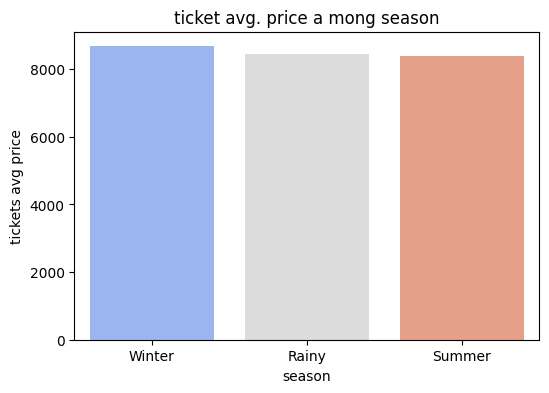

In [123]:
# Barplot chart Reflect ticket avg. price a mong season
plt.figure(figsize=(6, 4))
sns.barplot(data=season_rate,x='season', y='price', palette='coolwarm')
plt.ylabel('tickets avg price')
plt.xlabel('season')
plt.title('ticket avg. price a mong season')
plt.show()

* The average ticket prices during different seasons highlight variations in pricing across seasonal periods. Winter exhibits the highest mean ticket price at ₹8676.65, followed closely by Rainy with an average of ₹8437.12. Summer shows a slightly lower mean price at ₹8392.95. 

### 8. Which dep_time have higher mean price ticket?

In [124]:
dep_time_rate = pd.DataFrame(round(df.groupby('dep_time')['price'].mean().sort_values(ascending=False).reset_index(),2))
dep_time_rate 

,dep_time,price
0,Morning,9112.48
1,Afternoon,8375.73
2,Early Morning,8298.63
3,Evening,8230.87
4,Late Night,7815.69
5,Night,7737.90


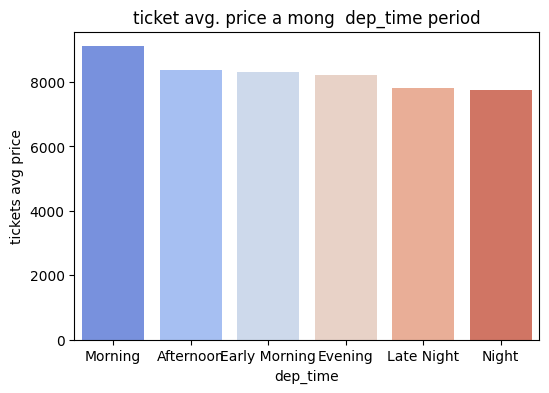

In [126]:
# Barplot chart Reflect ticket avg. price a mong dep_time period
plt.figure(figsize=(6, 4))
sns.barplot(data=dep_time_rate,x='dep_time', y='price', palette='coolwarm')
plt.ylabel('tickets avg price')
plt.xlabel('dep_time')
plt.title('ticket avg. price a mong  dep_time period')
plt.show()

* The average ticket prices during different departure times of the day reveal variations in pricing across various time intervals. Morning flights have the highest mean ticket price at ₹9112.48, followed by Afternoon (₹8375.73) and Early Morning (₹8298.63). Evening flights show a slightly lower mean price at ₹8230.87, while Late Night and Night flights have averages of ₹7815.69 and ₹7737.90, respectively. 

### 9. Which arrival_time have higher mean price ticket?

In [127]:
arrival_time_rate = pd.DataFrame(round(df.groupby('arrival_time')['price'].mean().sort_values(ascending=False).reset_index(),2))
arrival_time_rate 

,arrival_time,price
0,Evening,9947.94
1,Early Morning,8787.97
2,Night,8183.96
3,Afternoon,8018.36
4,Late Night,7251.87
5,Morning,6908.47


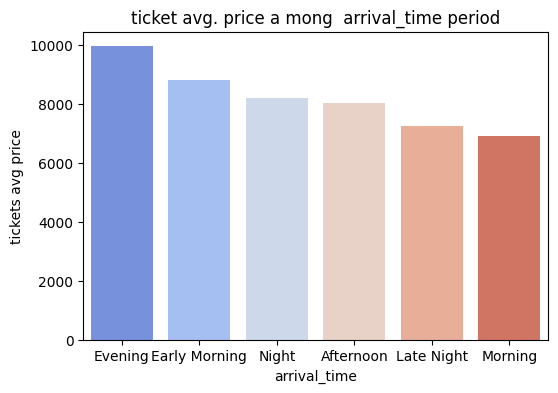

In [128]:
# Barplot chart Reflect ticket avg. price a mong arrival_time period
plt.figure(figsize=(6, 4))
sns.barplot(data=arrival_time_rate ,x='arrival_time', y='price', palette='coolwarm')
plt.ylabel('tickets avg price')
plt.xlabel('arrival_time')
plt.title('ticket avg. price a mong  arrival_time period')
plt.show()


* The average ticket prices during different arrival times of the day demonstrate variations in pricing across various time intervals. Evening arrivals have the highest mean ticket price at ₹9947.94, followed by Early Morning (₹8787.97) and Night (₹8183.96). Afternoon arrivals show a slightly lower mean price at ₹8018.36, while Late Night and Morning arrivals have averages of ₹7251.87 and ₹6908.47, respectively.

# ***4. Analysis outcomes or summary:***

## **1. Statistical analysis:** 
   - Explore important numerical and categorical features.
* **First Statistical Description for Some Numeric Features:** 

    1. **price:** Ranges from **1759** to **79512**, The mean price is **8446.46**, and the median is **7318**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper ticket price values.

    2. **duration:** Ranges from **75** to **2820** minutes, The mean duration is **527.90**, and the median is **390.00**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper ticket price values.

    3. **year:** As all description like the min,max,median, and mean all have the same value 2019 which reflect all the data collected or concerned with year 2019. 

* **Second Statistical Description for Categorical Features:**
    1. **airline:** Out of **8,422** airline ticket, the most frequented airline name is **Jet Airways**, which has **2575** values out of 12 total airline company unique name.
    
    2. **source:** Out of **8,422** airline ticket, the most frequented source city is **Delhi**, which has **3511** source values out of 5 total source city unique name.
    
    3. **destination:** Out of **8,422** airline ticket, the most frequented destination city is **Cochin**, which has **3511** values out of 5 total destination city unique name.
    
    4. **route:** Out of **8,422** airline ticket, the most frequented route is **DEL → BOM → COK**, which has **1924** values out of 112 total route unique name with only One stop trip.
    
    5. **day_name:** Out of **8,422** airline ticket, the most frequented day_name is **Thursday**, which has **1795** values out of 7 total unique day_name.
    
    6. **season:** Out of **8,422** airline ticket, the most frequented season is **Summer**, which has **4396** values out of 3 total unique season in the data indicate one missing season from the data and the data not covering all the year 2019.
    
    7. **dep_time:** Out of **8,422** airline ticket, the most frequented dep_time is **Morning**, which has **2365** values out of 6 total unique dep_time during the day.
    
    8. **arrival_time:** Out of **8,422** airline ticket, the most frequented arrival_time is **Evening**, which has **2296** values out of 6 total unique arrival_time during the day.
    
------------------------------------------- 
 
## **2. Correlation & Correlation Heatmap:** 
   ## Correlation Analysis Summary

The correlation reveals the relationships between various features in the dataset:
1. Duration and Total Stops:
- Strong positive correlation (0.74): Longer durations are associated with more total stops.
2. Duration and Price:
- Moderate positive correlation (0.51): Longer durations are associated with higher prices.
3. Total Stops and Price:
- Moderate positive correlation (0.62): More total stops are associated with higher prices.
While it is often assumed that an increase in the number of total stops or longer flight durations would lead to lower ticket prices, the data suggests the opposite. The correlations indicate that, on average, longer durations and more total stops tend to be associated with higher ticket prices. This Unexpectedly finding underscores the complexity of factors influencing airfare and emphasizes the importance of considering various aspects when predicting ticket prices.

Note: Correlation does not imply causation, and these interpretations are based on the observed associations in the data.

----------------------------

## **3. Analysis and visualization around the following questions**
### - Univariate analysis:

**1. What are the top airline company with numbers of ticket sold?**

* The data shows Jet Airways as the most frequent airline (2575 instances), followed by IndiGo (1875) and other notable low-cost carriers. Legacy carrier Air India is also significant (1243 instances), with instances of multiple carriers (1093 occurrences). Premium economy options from Vistara and multiple carriers are mentioned, though less frequently (3 and 13 instances).

**2. What are the top source city with numbers of ticket sold?**

* The data displays the frequency distribution of source cities in the dataset, with Delhi being the most frequent (3511 instances), followed by Kolkata (2094) and Banglore (1806). Mumbai and Chennai also appear, though with lower frequencies (642 and 369 instances, respectively).

**3. What are the top destination city with numbers of ticket sold?**

* The data illustrates the frequency distribution of destination cities in the dataset. Cochin is the most common destination (3511 instances), followed by Banglore (2094) and Delhi (1806). Hyderabad and Kolkata also appear, though with lower frequencies (642 and 369 instances, respectively).

**4. What are the top 5 route with numbers of ticket sold?**

* The data showcases the frequency distribution of the top 5 trip routes in the dataset. The route DEL → BOM → COK is the most common, appearing 1924 times, followed by BLR → DEL (1455 instances) and CCU → BLR (665 instances). The route CCU → BOM → BLR and BOM → HYD also feature, though with slightly lower frequencies (637 and 607 instances, respectively).

**5. what is the mean duration and statistcal discription of the duration feature?**

* The duration in minutes column statistics reveal key insights about the distribution of flight durations in the dataset. The data comprises 8422 instances, with a mean duration of approximately 527.90 minutes. The mean being greater than the median (50th percentile) suggests a right-skewed distribution, indicating that there are outliers contributing to higher durations. The variability is substantial, as indicated by the standard deviation of 447.17 minutes. The minimum duration is 75 minutes, with quartiles at 170 (25th percentile), 390 (50th percentile), and 750 (75th percentile) minutes. The maximum recorded duration is 2820 minutes.

**6. What are the top total_stops with numbers of ticket sold?**

* The total trip stops distribution provides insights into the number of stops in the dataset. The majority of trips have 1 stop (4227 instances), followed by non-stop flights (3306 instances). Trips with 2 stops are less common but still significant (864 instances). Trips with 3 stops are relatively rare, with only 25 instances. This concise summary offers a quick overview of the prevalence of different total stop counts in the dataset, highlighting the dominance of single-stop and non-stop flights.

**7. what is the mean price and statistcal discription of the price feature?**

* The price column statistics reveal key insights about the distribution of ticket prices in the dataset. The data comprises 8422 instances, with a mean price of approximately ₹8446.46 (Indian Rupees). The fact that the mean is greater than the median (50th percentile) suggests a right-skewed distribution, indicating the presence of outliers contributing to higher ticket prices. The variability is substantial, as indicated by the standard deviation of ₹4415.85. The minimum ticket price is ₹1759, with quartiles at ₹4839.75 (25th percentile), ₹7318 (50th percentile), and ₹11264 (75th percentile). The maximum recorded price is ₹79512.

**8. What is the distribution of tickets during months?**

* The month table distribution highlights the frequency of flight occurrences in the dataset. June (Month 6) dominates with 2135 instances, followed by May (Month 5) at 2025, and March (Month 3) at 1947. September (Month 9) and January (Month 1) show lower frequencies with 752 and 619 instances, respectively. December (Month 12) and April (Month 4) have fewer instances, at 520 and 424. 
* Notably, there is no data available for February, July, August, October, and November, indicating a lack of information for those months. 

**9. What is the distribution of tickets during days of the month?**

* The day of the month distribution reveals the frequency of flight occurrences on different days in the dataset. The 6th day has the highest frequency with 1409 instances, followed by the 27th (1092) and 21st (1054) days. The 24th and 15th days also show notable frequencies with 1013 and 962 instances, respectively. Days 3, 5, 18, and 4 have fewer instances, ranging from 468 to 778.

**10. What is the distribution of tickets during days of the week?**

* The distribution of days of the week reveals the frequency of flight occurrences on different weekdays in the dataset. Thursday has the highest frequency with 1795 instances, followed by Wednesday (1274) and Monday (1222). Friday and Saturday also show notable frequencies with 1207 and 1044 instances, respectively. Tuesday and Sunday have fewer instances, with 982 and 898, respectively.

**11. What is the distribution of tickets during holiday?**

* The distribution of holiday values reveals the frequency of flight occurrences on holidays and non-holidays in the dataset. Non-holidays (value 0) have the highest 76.9% frequency with 6480 instances, while holidays (value 1) also show 23.1% a substantial occurrence with 1942 instances.

**12. What is the distribution of tickets during seasons?**

* The distribution of season values highlights the frequency of flight occurrences during different seasons in the dataset. 52.2% Summer has the highest frequency with 4396 instances, followed by 34.3% Rainy (2887) and 13.5% Winter with (1139) instances.
* As mentioned earlier the missing of October and November data reflect in missing Autumn season.

**13. What is the distribution of tickets during dep_time?**

* The distribution of departure times of the day provides insights into the frequency of flight occurrences during different time intervals. 28.1% Morning has the highest frequency with 2365 instances, followed by 25.1% Early Morning (2117) and 18.2% Evening (1536). 14% Afternoon and 11.2% Night also show notable frequencies with 1176 and 942 instances, respectively. Only 3.4% Late Night has a lower frequency with 286 instances.

**14. What is the distribution of tickets during arrival_time?**

* The distribution of arrival times of the day sheds light on the frequency of flight occurrences during different time intervals. 27.3% Evening has the highest frequency with 2296 instances, followed by 24.7% Night (2084) and 16.4% Afternoon (1379). 14.7% Morning and 10% Early Morning also show notable frequencies with 1234 and 843 instances, respectively. 7% Late Night has a lower frequency with 586 instances.

### - Bivariate analysis:

**1. Which airline company have higher mean price ticket?**

* The mean ticket prices for different airline companies provide insights into the average cost of flights with each carrier. Jet Airways Business has the highest mean price at ₹59573.40, followed by Multiple carriers Premium economy (₹11418.85), Jet Airways (₹11058.11), and Multiple carriers (₹10753.92). Vistara Premium economy, Air India, and Vistara also have notable mean prices at ₹8962.33, ₹8916.58, and ₹7463.21, respectively. The mean prices gradually decrease for GoAir, IndiGo, Air Asia, SpiceJet, and Trujet.

**2. Which source city have higher mean price ticket?**

* The mean ticket prices for different source cities provide insights into the average cost of flights originating from each location. Delhi has the highest mean price at ₹10100.14, followed by Kolkata (₹8761.80), Banglore (₹7024.84), Chennai (₹4765.76), and Mumbai (₹4488.85).

**3. Which destination city have higher mean price ticket?**

* The mean ticket prices for different destination cities provide insights into the average cost of flights arriving at each location. Cochin has the highest mean price at ₹10100.14, followed by Banglore (₹8761.80), Delhi (₹7024.84), Kolkata (₹4765.76), and Hyderabad (₹4488.85).

**4. Which trip route have higher mean price ticket?**

* the highest avg. price route with 2 stops BOM → VNS → DEL → HYD  cost 23528 avg. price. 
* the least avg.price route dirct or non-stop trip  BOM → HYD with 3959.82 avg price cost.

**5. Which month have higher mean price ticket?**

* The average ticket prices vary across different months, providing insights into seasonal trends. January sees a mean ticket price of ₹9406.10, while May follows closely at ₹9253.13. June maintains a slightly lower average at ₹8541.82, and March and September have average prices of ₹8186.92 and ₹8139.87, respectively. December shows a mean ticket price of ₹7808.33, and April has a comparatively lower average at ₹5230.86.

**6. Which week day have higher mean price ticket?**

* The average ticket prices during different weekdays reveal fluctuations in pricing throughout the week. Sunday leads with a mean ticket price of ₹9448.87, followed by Thursday at ₹9080.84. Monday and Saturday maintain similar average prices, with ₹8596.31 and ₹8567.13, respectively. Tuesday shows a slightly lower average at ₹8276.37, while Friday has a mean ticket price of ₹7660.79. Wednesday marks the lowest average price among weekdays at ₹7478.91. 

**7. Which season have higher mean price ticket?**

* The average ticket prices during different seasons highlight variations in pricing across seasonal periods. Winter exhibits the highest mean ticket price at ₹8676.65, followed closely by Rainy with an average of ₹8437.12. Summer shows a slightly lower mean price at ₹8392.95.

**8. Which dep_time have higher mean price ticket?**

* The average ticket prices during different departure times of the day reveal variations in pricing across various time intervals. Morning flights have the highest mean ticket price at ₹9112.48, followed by Afternoon (₹8375.73) and Early Morning (₹8298.63). Evening flights show a slightly lower mean price at ₹8230.87, while Late Night and Night flights have averages of ₹7815.69 and ₹7737.90, respectively.

**9. Which arrival_time have higher mean price ticket?**

* The average ticket prices during different arrival times of the day demonstrate variations in pricing across various time intervals. Evening arrivals have the highest mean ticket price at ₹9947.94, followed by Early Morning (₹8787.97) and Night (₹8183.96). Afternoon arrivals show a slightly lower mean price at ₹8018.36, while Late Night and Morning arrivals have averages of ₹7251.87 and ₹6908.47, respectively.

## Conclusion:
In conclusion, this analysis provides a comprehensive understanding of the airline dataset, aiding in strategic decision-making for airlines and travel agencies. The insights into pricing, popular routes, and temporal trends can guide marketing, scheduling, and pricing strategies. Additionally, the identification of data gaps underscores the importance of data completeness for robust analyses. Future studies could delve deeper into specific factors influencing pricing and customer choices, contributing to a more nuanced understanding of the aviation industry.